In [1]:
%matplotlib inline
from __future__ import division
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import csv
import pandas as pd
import matplotlib as mpl
from util.stragglers import straggler_freq,task_hist,straggler_samples,slowest_impact
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True

blues = cm.get_cmap(plt.get_cmap('Blues'))
greens = cm.get_cmap(plt.get_cmap('Greens'))
reds = cm.get_cmap(plt.get_cmap('Reds'))
oranges = cm.get_cmap(plt.get_cmap('Oranges'))
purples = cm.get_cmap(plt.get_cmap('Purples'))
greys = cm.get_cmap(plt.get_cmap('Greys'))

from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))

# Stragglers Impact

In [2]:
wrangler_mpicppx1 = pd.DataFrame.from_csv('stragglers/tidy_data/StrongScaling/wrangler_mpic++_NoIO.csv').drop(['Framework'],axis=1)
wrangler_mpicppx2 = pd.DataFrame.from_csv('stragglers/tidy_data/StrongScaling/wrangler_mpic++_NoIOx2.csv').drop(['Framework'],axis=1)
wrangler_mpicppx4 = pd.DataFrame.from_csv('stragglers/tidy_data/StrongScaling/wrangler_mpic++_NoIOx4.csv').drop(['Framework'],axis=1)
wrangler_mpicppx8 = pd.DataFrame.from_csv('stragglers/tidy_data/StrongScaling/wrangler_mpic++_NoIOx8.csv').drop(['Framework'],axis=1)
comet_mpicppx1    = pd.DataFrame.from_csv('stragglers/tidy_data/StrongScaling/comet_mpic++_NoIO.csv').drop(['Framework'],axis=1)
supermic_mpicppx1 = pd.DataFrame.from_csv('stragglers/tidy_data/StrongScaling/supermic_mpic++_NoIO.csv').drop(['Framework'],axis=1)
juliet_mpicppx1   = pd.DataFrame.from_csv('stragglers/tidy_data/juliet_mpic++NoIOx1.csv')

comet_mpi4py = pd.DataFrame.from_csv('stragglers/tidy_data/StrongScaling/comet_mpi4py_NoIO.csv').drop(['Framework'],axis=1)
comet_dask   = pd.DataFrame.from_csv('stragglers/tidy_data/StrongScaling/comet_dask_NoIO.csv').drop(['Framework'],axis=1)
comet_spark  = pd.DataFrame.from_csv('stragglers/tidy_data/StrongScaling/comet_spark_NoIO.csv').drop(['Framework'],axis=1)
comet_rp     = pd.DataFrame.from_csv('stragglers/tidy_data/StrongScaling/comet_rp_NoIO.csv').drop(['Framework'],axis=1)

wrangler_mpi4py = pd.DataFrame.from_csv('stragglers/tidy_data/StrongScaling/wrangler_mpi4py_NoIO.csv').drop(['Framework'],axis=1)
wrangler_dask   = pd.DataFrame.from_csv('stragglers/tidy_data/StrongScaling/wrangler_dask_NoIO.csv').drop(['Framework'],axis=1)
wrangler_spark  = pd.DataFrame.from_csv('stragglers/tidy_data/StrongScaling/wrangler_spark_NoIO.csv').drop(['Framework'],axis=1)
wrangler_rp     = pd.DataFrame.from_csv('stragglers/tidy_data/StrongScaling/wrangler_rp_NoIO.csv').drop(['Framework'],axis=1)

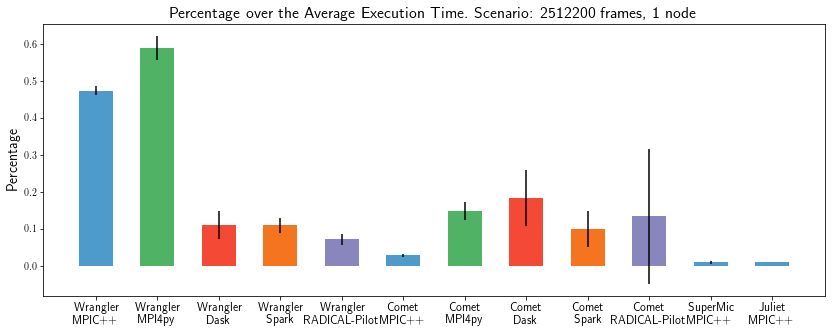

In [3]:
impactWranglerMpiCpp1 = slowest_impact(df=wrangler_mpicppx1,nodes=[1],cores=24)
impactCometMpiCpp1    = slowest_impact(df=comet_mpicppx1,nodes=[1],cores=24)
impactSuperMicMpiCpp1 = slowest_impact(df=supermic_mpicppx1,nodes=[1],cores=20)
impactJulietMpiCpp1   = slowest_impact(df=juliet_mpicppx1,nodes=[1],cores=24)
impactCometMpi4py1    = slowest_impact(df=comet_mpi4py,nodes=[1],cores=24)
impactWranglerMpi4py1 = slowest_impact(df=wrangler_mpi4py,nodes=[1],cores=24)
impactCometDask1      = slowest_impact(df=comet_dask,nodes=[1],cores=24)
impactWranglerDask1   = slowest_impact(df=wrangler_dask,nodes=[1],cores=24)
impactCometSpark1     = slowest_impact(df=comet_spark,nodes=[1],cores=24)
impactWranglerSpark1  = slowest_impact(df=wrangler_spark,nodes=[1],cores=24)
impactCometRp1        = slowest_impact(df=comet_rp,nodes=[1],cores=24)
impactWranglerRp1     = slowest_impact(df=wrangler_rp,nodes=[1],cores=24)

fig,axes = plt.subplots(nrows=1,ncols=1, sharex=True,sharey=True,figsize=[14,5],gridspec_kw={'wspace':0.05, 'hspace':0.05})
width = 0.55
axes.bar(0, np.mean(impactWranglerMpiCpp1),yerr=np.std(impactWranglerMpiCpp1),color=blues(150),width=width,label='Wrangler MPIC++')
axes.bar(1, np.mean(impactWranglerMpi4py1),yerr=np.std(impactWranglerMpi4py1),color=greens(150),width=width,label='Wrangler MPI4py')
axes.bar(2, np.mean(impactWranglerDask1  ),yerr=np.std(impactWranglerDask1  ),color=reds(150),width=width,label='Wrangler Dask')
axes.bar(3, np.mean(impactWranglerSpark1 ),yerr=np.std(impactWranglerSpark1 ),color=oranges(150),width=width,label='Wrangler Spark')
axes.bar(4, np.mean(impactWranglerRp1    ),yerr=np.std(impactWranglerRp1    ),color=purples(150),width=width,label='Wrangler RADICAL-Pilot')
axes.bar(5, np.mean(impactCometMpiCpp1   ),yerr=np.std(impactCometMpiCpp1   ),color=blues(150),width=width,label='Comet MPIC++')
axes.bar(6, np.mean(impactCometMpi4py1   ),yerr=np.std(impactCometMpi4py1   ),color=greens(150),width=width,label='Comet MPI4py')
axes.bar(7, np.mean(impactCometDask1     ),yerr=np.std(impactCometDask1     ),color=reds(150),width=width,label='Comet Dask')
axes.bar(8, np.mean(impactCometSpark1    ),yerr=np.std(impactCometSpark1    ),color=oranges(150),width=width,label='Comet Spark')
axes.bar(9, np.mean(impactCometRp1       ),yerr=np.std(impactCometRp1       ),color=purples(150),width=width,label='Comet RADICAL-Pilot')
axes.bar(10,np.mean(impactSuperMicMpiCpp1),yerr=np.std(impactSuperMicMpiCpp1),color=blues(150),width=width,label='SuperMic MPIC++')
axes.bar(11,np.mean(impactJulietMpiCpp1  ),yerr=np.std(impactJulietMpiCpp1  ),color=blues(150),width=width,label='Juliet MPIC++')
axes.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11])
axes.set_xticklabels(['Wrangler\nMPIC++','Wrangler\nMPI4py','Wrangler\nDask','Wrangler\nSpark','Wrangler\nRADICAL-Pilot','Comet\nMPIC++','Comet\nMPI4py',\
                      'Comet\nDask','Comet\nSpark','Comet\nRADICAL-Pilot','SuperMic\nMPIC++','Juliet\nMPIC++'],fontsize=12)
axes.set_ylabel('Percentage',fontsize=14)
axes.set_title('Percentage over the Average Execution Time. Scenario: 2512200 frames, 1 node',fontsize=16)
#fig.savefig('stragglers/tidy_data/impact1node.pdf',dpi=800,bbox_inches='tight',pad_inches=0)

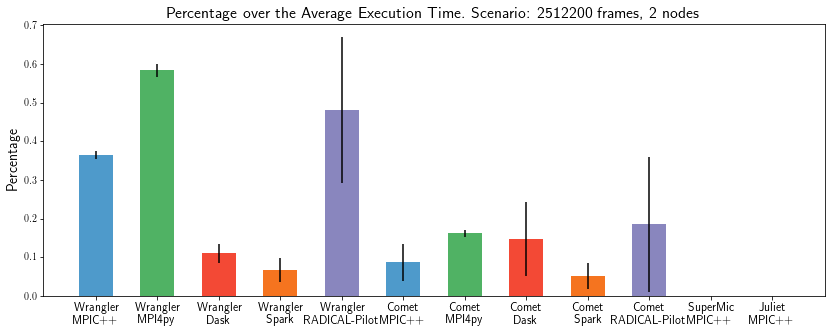

In [4]:
impactWranglerMpiCpp2 = slowest_impact(df=wrangler_mpicppx1,nodes=[2],cores=24)
impactCometMpiCpp2    = slowest_impact(df=comet_mpicppx1,nodes=[2],cores=24)
#impactSuperMicMpiCpp2 = slowest_impact(df=supermic_mpicppx1,nodes=[2],cores=20)
#impactJulietMpiCpp2   = slowest_impact(df=juliet_mpicppx1,nodes=[2],cores=24)
impactCometMpi4py2    = slowest_impact(df=comet_mpi4py,nodes=[2],cores=24)
impactWranglerMpi4py2 = slowest_impact(df=wrangler_mpi4py,nodes=[2],cores=24)
impactCometDask2      = slowest_impact(df=comet_dask,nodes=[2],cores=24)
impactWranglerDask2   = slowest_impact(df=wrangler_dask,nodes=[2],cores=24)
impactCometSpark2     = slowest_impact(df=comet_spark,nodes=[2],cores=24)
impactWranglerSpark2  = slowest_impact(df=wrangler_spark,nodes=[2],cores=24)
impactCometRp2        = slowest_impact(df=comet_rp,nodes=[2],cores=24)
impactWranglerRp2     = slowest_impact(df=wrangler_rp,nodes=[2],cores=24)

fig,axes = plt.subplots(nrows=1,ncols=1, sharex=True,sharey=True,figsize=[14,5],gridspec_kw={'wspace':0.05, 'hspace':0.05})
width = 0.55

axes.bar(0, np.mean(impactWranglerMpiCpp2),yerr=np.std(impactWranglerMpiCpp2),color=blues(150),width=width,label='Wrangler MPIC++')
axes.bar(1, np.mean(impactWranglerMpi4py2),yerr=np.std(impactWranglerMpi4py2),color=greens(150),width=width,label='Wrangler MPI4py')
axes.bar(2, np.mean(impactWranglerDask2  ),yerr=np.std(impactWranglerDask2  ),color=reds(150),width=width,label='Wrangler Dask')
axes.bar(3, np.mean(impactWranglerSpark2 ),yerr=np.std(impactWranglerSpark2 ),color=oranges(150),width=width,label='Wrangler Spark')
axes.bar(4, np.mean(impactWranglerRp2    ),yerr=np.std(impactWranglerRp2    ),color=purples(150),width=width,label='Wrangler RADICAL-Pilot')
axes.bar(5, np.mean(impactCometMpiCpp2   ),yerr=np.std(impactCometMpiCpp2   ),color=blues(150),width=width,label='Comet MPIC++')
axes.bar(6, np.mean(impactCometMpi4py2   ),yerr=np.std(impactCometMpi4py2   ),color=greens(150),width=width,label='Comet MPI4py')
axes.bar(7, np.mean(impactCometDask2     ),yerr=np.std(impactCometDask2     ),color=reds(150),width=width,label='Comet Dask')
axes.bar(8, np.mean(impactCometSpark2    ),yerr=np.std(impactCometSpark2    ),color=oranges(150),width=width,label='Comet Spark')
axes.bar(9, np.mean(impactCometRp2       ),yerr=np.std(impactCometRp2       ),color=purples(150),width=width,label='Comet RADICAL-Pilot')
axes.bar(10,np.mean(0),yerr=np.std(0),color=blues(150),width=width,label='SuperMic MPIC++')
axes.bar(11,np.mean(0  ),yerr=np.std(0  ),color=blues(150),width=width,label='Juliet MPIC++')
axes.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11])
axes.set_xticklabels(['Wrangler\nMPIC++','Wrangler\nMPI4py','Wrangler\nDask','Wrangler\nSpark','Wrangler\nRADICAL-Pilot','Comet\nMPIC++','Comet\nMPI4py',\
                      'Comet\nDask','Comet\nSpark','Comet\nRADICAL-Pilot','SuperMic\nMPIC++','Juliet\nMPIC++'],fontsize=12)
axes.set_ylabel('Percentage',fontsize=14)
axes.set_title('Percentage over the Average Execution Time. Scenario: 2512200 frames, 2 nodes',fontsize=16)
#fig.savefig('stragglers/tidy_data/impact2node.pdf',dpi=800,bbox_inches='tight',pad_inches=0)

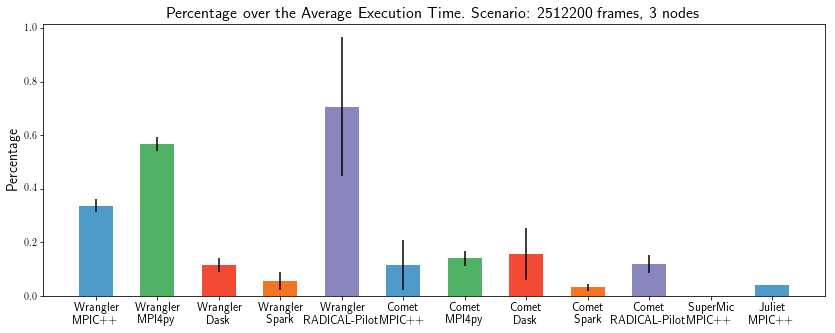

In [5]:
impactWranglerMpiCpp3 = slowest_impact(df=wrangler_mpicppx1,nodes=[3],cores=24)
impactCometMpiCpp3    = slowest_impact(df=comet_mpicppx1,nodes=[3],cores=24)
#impactSuperMicMpiCpp3 = slowest_impact(df=supermic_mpicppx1,nodes=[3],cores=20)
impactJulietMpiCpp3   = slowest_impact(df=juliet_mpicppx1,nodes=[3],cores=24)
impactCometMpi4py3    = slowest_impact(df=comet_mpi4py,nodes=[3],cores=24)
impactWranglerMpi4py3 = slowest_impact(df=wrangler_mpi4py,nodes=[3],cores=24)
impactCometDask3      = slowest_impact(df=comet_dask,nodes=[3],cores=24)
impactWranglerDask3   = slowest_impact(df=wrangler_dask,nodes=[3],cores=24)
impactCometSpark3     = slowest_impact(df=comet_spark,nodes=[3],cores=24)
impactWranglerSpark3  = slowest_impact(df=wrangler_spark,nodes=[3],cores=24)
impactCometRp3        = slowest_impact(df=comet_rp,nodes=[3],cores=24)
impactWranglerRp3     = slowest_impact(df=wrangler_rp,nodes=[3],cores=24)


fig,axes = plt.subplots(nrows=1,ncols=1, sharex=True,sharey=True,figsize=[14,5],gridspec_kw={'wspace':0.05, 'hspace':0.05})
width = 0.55

axes.bar(0, np.mean(impactWranglerMpiCpp3),yerr=np.std(impactWranglerMpiCpp3),color=blues(150),width=width,label='Wrangler MPIC++')
axes.bar(1, np.mean(impactWranglerMpi4py3),yerr=np.std(impactWranglerMpi4py3),color=greens(150),width=width,label='Wrangler MPI4py')
axes.bar(2, np.mean(impactWranglerDask3  ),yerr=np.std(impactWranglerDask3  ),color=reds(150),width=width,label='Wrangler Dask')
axes.bar(3, np.mean(impactWranglerSpark3 ),yerr=np.std(impactWranglerSpark3 ),color=oranges(150),width=width,label='Wrangler Spark')
axes.bar(4, np.mean(impactWranglerRp3    ),yerr=np.std(impactWranglerRp3    ),color=purples(150),width=width,label='Wrangler RADICAL-Pilot')
axes.bar(5, np.mean(impactCometMpiCpp3   ),yerr=np.std(impactCometMpiCpp3   ),color=blues(150),width=width,label='Comet MPIC++')
axes.bar(6, np.mean(impactCometMpi4py3   ),yerr=np.std(impactCometMpi4py3   ),color=greens(150),width=width,label='Comet MPI4py')
axes.bar(7, np.mean(impactCometDask3     ),yerr=np.std(impactCometDask3     ),color=reds(150),width=width,label='Comet Dask')
axes.bar(8, np.mean(impactCometSpark3    ),yerr=np.std(impactCometSpark3    ),color=oranges(150),width=width,label='Comet Spark')
axes.bar(9, np.mean(impactCometRp3       ),yerr=np.std(impactCometRp3       ),color=purples(150),width=width,label='Comet RADICAL-Pilot')
axes.bar(10,np.mean(0),yerr=np.std(0),color=blues(150),width=width,label='SuperMic MPIC++')
axes.bar(11,np.mean(impactJulietMpiCpp3  ),yerr=np.std(impactJulietMpiCpp3  ),color=blues(150),width=width,label='Juliet MPIC++')
axes.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11])
axes.set_xticklabels(['Wrangler\nMPIC++','Wrangler\nMPI4py','Wrangler\nDask','Wrangler\nSpark','Wrangler\nRADICAL-Pilot','Comet\nMPIC++','Comet\nMPI4py',\
                      'Comet\nDask','Comet\nSpark','Comet\nRADICAL-Pilot','SuperMic\nMPIC++','Juliet\nMPIC++'],fontsize=12)
axes.set_ylabel('Percentage',fontsize=14)
axes.set_title('Percentage over the Average Execution Time. Scenario: 2512200 frames, 3 nodes',fontsize=16)
#fig.savefig('stragglers/tidy_data/impact3node.pdf',dpi=800,bbox_inches='tight',pad_inches=0)

# Weak Scaling Impact

In [6]:
wrangler_mpicppx1 = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/wrangler_mpic++_NoIO.csv').drop(['Framework'],axis=1)
comet_mpicppx1    = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/comet_mpic++_NoIO.csv').drop(['Framework'],axis=1)

comet_mpi4py = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/comet_mpi4py_NoIO.csv').drop(['Framework'],axis=1)
comet_dask   = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/comet_dask_NoIO.csv').drop(['Framework'],axis=1)
comet_spark  = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/comet_spark_NoIO.csv').drop(['Framework'],axis=1)
comet_rp     = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/comet_rp_NoIO.csv').drop(['Framework'],axis=1)

wrangler_mpi4py = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/wrangler_mpi4py_NoIO.csv').drop(['Framework'],axis=1)
wrangler_dask   = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/wrangler_dask_NoIO.csv').drop(['Framework'],axis=1)
wrangler_spark  = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/wrangler_spark_NoIO.csv').drop(['Framework'],axis=1)
wrangler_rp     = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/wrangler_rp_NoIO.csv').drop(['Framework'],axis=1)

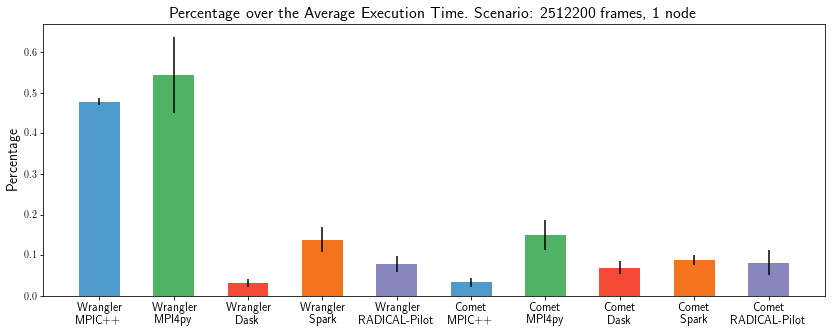

In [7]:
impactWranglerMpiCpp1 = slowest_impact(df=wrangler_mpicppx1,nodes=[1],cores=24)
impactCometMpiCpp1    = slowest_impact(df=comet_mpicppx1,nodes=[1],cores=24)
impactCometMpi4py1    = slowest_impact(df=comet_mpi4py,nodes=[1],cores=24)
impactWranglerMpi4py1 = slowest_impact(df=wrangler_mpi4py,nodes=[1],cores=24)
impactCometDask1      = slowest_impact(df=comet_dask,nodes=[1],cores=24)
impactWranglerDask1   = slowest_impact(df=wrangler_dask,nodes=[1],cores=24)
impactCometSpark1     = slowest_impact(df=comet_spark,nodes=[1],cores=24)
impactWranglerSpark1  = slowest_impact(df=wrangler_spark,nodes=[1],cores=24)
impactCometRp1        = slowest_impact(df=comet_rp,nodes=[1],cores=24)
impactWranglerRp1     = slowest_impact(df=wrangler_rp,nodes=[1],cores=24)


fig,axes = plt.subplots(nrows=1,ncols=1, sharex=True,sharey=True,figsize=[14,5],gridspec_kw={'wspace':0.05, 'hspace':0.05})
width = 0.55
axes.bar(0, np.mean(impactWranglerMpiCpp1),yerr=np.std(impactWranglerMpiCpp1),color=blues(150),width=width,label='Wrangler MPIC++')
axes.bar(1, np.mean(impactWranglerMpi4py1),yerr=np.std(impactWranglerMpi4py1),color=greens(150),width=width,label='Wrangler MPI4py')
axes.bar(2, np.mean(impactWranglerDask1  ),yerr=np.std(impactWranglerDask1  ),color=reds(150),width=width,label='Wrangler Dask')
axes.bar(3, np.mean(impactWranglerSpark1 ),yerr=np.std(impactWranglerSpark1 ),color=oranges(150),width=width,label='Wrangler Spark')
axes.bar(4, np.mean(impactWranglerRp1    ),yerr=np.std(impactWranglerRp1    ),color=purples(150),width=width,label='Wrangler RADICAL-Pilot')
axes.bar(5, np.mean(impactCometMpiCpp1   ),yerr=np.std(impactCometMpiCpp1   ),color=blues(150),width=width,label='Comet MPIC++')
axes.bar(6, np.mean(impactCometMpi4py1   ),yerr=np.std(impactCometMpi4py1   ),color=greens(150),width=width,label='Comet MPI4py')
axes.bar(7, np.mean(impactCometDask1     ),yerr=np.std(impactCometDask1     ),color=reds(150),width=width,label='Comet Dask')
axes.bar(8, np.mean(impactCometSpark1    ),yerr=np.std(impactCometSpark1    ),color=oranges(150),width=width,label='Comet Spark')
axes.bar(9, np.mean(impactCometRp1       ),yerr=np.std(impactCometRp1       ),color=purples(150),width=width,label='Comet RADICAL-Pilot')
axes.set_xticks([0,1,2,3,4,5,6,7,8,9])
axes.set_xticklabels(['Wrangler\nMPIC++','Wrangler\nMPI4py','Wrangler\nDask','Wrangler\nSpark','Wrangler\nRADICAL-Pilot','Comet\nMPIC++','Comet\nMPI4py',\
                      'Comet\nDask','Comet\nSpark','Comet\nRADICAL-Pilot'],fontsize=12)
axes.set_ylabel('Percentage',fontsize=14)
axes.set_title('Percentage over the Average Execution Time. Scenario: 2512200 frames, 1 node',fontsize=16)
#fig.savefig('stragglers/tidy_data/impactWeak1node.pdf',dpi=800,bbox_inches='tight',pad_inches=0)

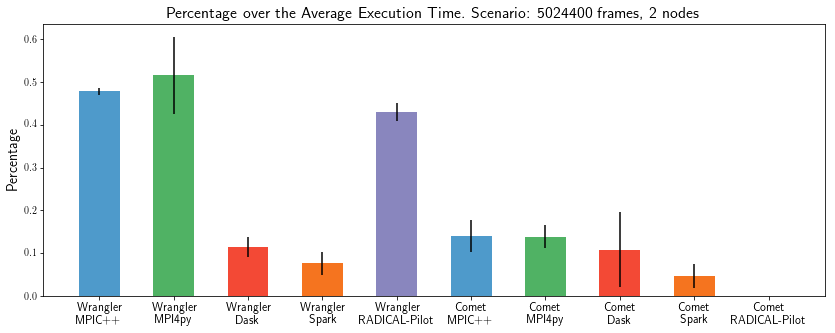

In [8]:
impactCometMpiCpp1    = slowest_impact(df=comet_mpicppx1,nodes=[2],cores=24)
impactCometMpi4py1    = slowest_impact(df=comet_mpi4py,nodes=[2],cores=24)
impactWranglerMpi4py1 = slowest_impact(df=wrangler_mpi4py,nodes=[2],cores=24)
impactCometDask1      = slowest_impact(df=comet_dask,nodes=[2],cores=24)
impactWranglerDask1   = slowest_impact(df=wrangler_dask,nodes=[2],cores=24)
impactCometSpark1     = slowest_impact(df=comet_spark,nodes=[2],cores=24)
impactWranglerSpark1  = slowest_impact(df=wrangler_spark,nodes=[2],cores=24)
impactCometRp1        = slowest_impact(df=comet_rp,nodes=[2],cores=24)
impactWranglerRp1     = slowest_impact(df=wrangler_rp,nodes=[2],cores=24)


fig,axes = plt.subplots(nrows=1,ncols=1, sharex=True,sharey=True,figsize=[14,5],gridspec_kw={'wspace':0.05, 'hspace':0.05})
width = 0.55
axes.bar(0, np.mean(impactWranglerMpiCpp1),yerr=np.std(impactWranglerMpiCpp1),color=blues(150),width=width,label='Wrangler MPIC++')
axes.bar(1, np.mean(impactWranglerMpi4py1),yerr=np.std(impactWranglerMpi4py1),color=greens(150),width=width,label='Wrangler MPI4py')
axes.bar(2, np.mean(impactWranglerDask1  ),yerr=np.std(impactWranglerDask1  ),color=reds(150),width=width,label='Wrangler Dask')
axes.bar(3, np.mean(impactWranglerSpark1 ),yerr=np.std(impactWranglerSpark1 ),color=oranges(150),width=width,label='Wrangler Spark')
axes.bar(4, np.mean(impactWranglerRp1    ),yerr=np.std(impactWranglerRp1    ),color=purples(150),width=width,label='Wrangler RADICAL-Pilot')
axes.bar(5, np.mean(impactCometMpiCpp1   ),yerr=np.std(impactCometMpiCpp1   ),color=blues(150),width=width,label='Comet MPIC++')
axes.bar(6, np.mean(impactCometMpi4py1   ),yerr=np.std(impactCometMpi4py1   ),color=greens(150),width=width,label='Comet MPI4py')
axes.bar(7, np.mean(impactCometDask1     ),yerr=np.std(impactCometDask1     ),color=reds(150),width=width,label='Comet Dask')
axes.bar(8, np.mean(impactCometSpark1    ),yerr=np.std(impactCometSpark1    ),color=oranges(150),width=width,label='Comet Spark')
axes.bar(9, np.mean(0       ),yerr=np.std(0       ),color=purples(150),width=width,label='Comet RADICAL-Pilot')
axes.set_xticks([0,1,2,3,4,5,6,7,8,9])
axes.set_xticklabels(['Wrangler\nMPIC++','Wrangler\nMPI4py','Wrangler\nDask','Wrangler\nSpark','Wrangler\nRADICAL-Pilot','Comet\nMPIC++','Comet\nMPI4py',\
                      'Comet\nDask','Comet\nSpark','Comet\nRADICAL-Pilot'],fontsize=12)
axes.set_ylabel('Percentage',fontsize=14)
axes.set_title('Percentage over the Average Execution Time. Scenario: 5024400 frames, 2 nodes',fontsize=16)
#fig.savefig('stragglers/tidy_data/impactWeak2node.pdf',dpi=800,bbox_inches='tight',pad_inches=0)

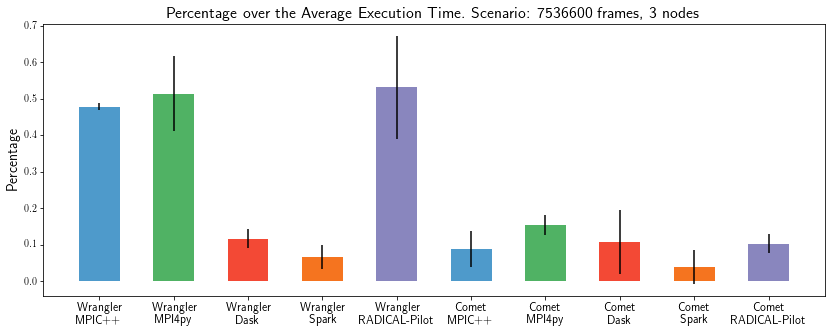

In [9]:
impactCometMpiCpp1    = slowest_impact(df=comet_mpicppx1,nodes=[3],cores=24)
impactCometMpi4py1    = slowest_impact(df=comet_mpi4py,nodes=[3],cores=24)
impactWranglerMpi4py1 = slowest_impact(df=wrangler_mpi4py,nodes=[3],cores=24)
impactCometDasfk1      = slowest_impact(df=comet_dask,nodes=[3],cores=24)
impactWranglerDask1   = slowest_impact(df=wrangler_dask,nodes=[3],cores=24)
impactCometSpark1     = slowest_impact(df=comet_spark,nodes=[3],cores=24)
impactWranglerSpark1  = slowest_impact(df=wrangler_spark,nodes=[3],cores=24)
impactCometRp1        = slowest_impact(df=comet_rp,nodes=[3],cores=24)
impactWranglerRp1     = slowest_impact(df=wrangler_rp,nodes=[3],cores=24)


fig,axes = plt.subplots(nrows=1,ncols=1, sharex=True,sharey=True,figsize=[14,5],gridspec_kw={'wspace':0.05, 'hspace':0.05})
width = 0.55
axes.bar(0, np.mean(impactWranglerMpiCpp1),yerr=np.std(impactWranglerMpiCpp1),color=blues(150),width=width,label='Wrangler MPIC++')
axes.bar(1, np.mean(impactWranglerMpi4py1),yerr=np.std(impactWranglerMpi4py1),color=greens(150),width=width,label='Wrangler MPI4py')
axes.bar(2, np.mean(impactWranglerDask1  ),yerr=np.std(impactWranglerDask1  ),color=reds(150),width=width,label='Wrangler Dask')
axes.bar(3, np.mean(impactWranglerSpark1 ),yerr=np.std(impactWranglerSpark1 ),color=oranges(150),width=width,label='Wrangler Spark')
axes.bar(4, np.mean(impactWranglerRp1    ),yerr=np.std(impactWranglerRp1    ),color=purples(150),width=width,label='Wrangler RADICAL-Pilot')
axes.bar(5, np.mean(impactCometMpiCpp1   ),yerr=np.std(impactCometMpiCpp1   ),color=blues(150),width=width,label='Comet MPIC++')
axes.bar(6, np.mean(impactCometMpi4py1   ),yerr=np.std(impactCometMpi4py1   ),color=greens(150),width=width,label='Comet MPI4py')
axes.bar(7, np.mean(impactCometDask1     ),yerr=np.std(impactCometDask1     ),color=reds(150),width=width,label='Comet Dask')
axes.bar(8, np.mean(impactCometSpark1    ),yerr=np.std(impactCometSpark1    ),color=oranges(150),width=width,label='Comet Spark')
axes.bar(9, np.mean(impactCometRp1       ),yerr=np.std(impactCometRp1       ),color=purples(150),width=width,label='Comet RADICAL-Pilot')
axes.set_xticks([0,1,2,3,4,5,6,7,8,9])
axes.set_xticklabels(['Wrangler\nMPIC++','Wrangler\nMPI4py','Wrangler\nDask','Wrangler\nSpark','Wrangler\nRADICAL-Pilot','Comet\nMPIC++','Comet\nMPI4py',\
                      'Comet\nDask','Comet\nSpark','Comet\nRADICAL-Pilot'],fontsize=12)
axes.set_ylabel('Percentage',fontsize=14)
axes.set_title('Percentage over the Average Execution Time. Scenario: 7536600 frames, 3 nodes',fontsize=16)
#fig.savefig('stragglers/tidy_data/impactWeak3node.pdf',dpi=800,bbox_inches='tight',pad_inches=0)

# Median Strong Scaling

In [10]:
wrangler_mpicppx1 = pd.DataFrame.from_csv('stragglers/tidy_data/StrongScaling/wrangler_mpic++_NoIO.csv').drop(['Framework'],axis=1)
wrangler_mpicppx2 = pd.DataFrame.from_csv('stragglers/tidy_data/StrongScaling/wrangler_mpic++_NoIOx2.csv').drop(['Framework'],axis=1)
wrangler_mpicppx4 = pd.DataFrame.from_csv('stragglers/tidy_data/StrongScaling/wrangler_mpic++_NoIOx4.csv').drop(['Framework'],axis=1)
wrangler_mpicppx8 = pd.DataFrame.from_csv('stragglers/tidy_data/StrongScaling/wrangler_mpic++_NoIOx8.csv').drop(['Framework'],axis=1)
comet_mpicppx1    = pd.DataFrame.from_csv('stragglers/tidy_data/StrongScaling/comet_mpic++_NoIO.csv').drop(['Framework'],axis=1)
supermic_mpicppx1 = pd.DataFrame.from_csv('stragglers/tidy_data/StrongScaling/supermic_mpic++_NoIO.csv').drop(['Framework'],axis=1)
juliet_mpicppx1   = pd.DataFrame.from_csv('stragglers/tidy_data/juliet_mpic++NoIOx1.csv')

comet_mpi4py = pd.DataFrame.from_csv('stragglers/tidy_data/StrongScaling/comet_mpi4py_NoIO.csv').drop(['Framework'],axis=1)
comet_dask   = pd.DataFrame.from_csv('stragglers/tidy_data/StrongScaling/comet_dask_NoIO.csv').drop(['Framework'],axis=1)
comet_spark  = pd.DataFrame.from_csv('stragglers/tidy_data/StrongScaling/comet_spark_NoIO.csv').drop(['Framework'],axis=1)
comet_rp     = pd.DataFrame.from_csv('stragglers/tidy_data/StrongScaling/comet_rp_NoIO.csv').drop(['Framework'],axis=1)

wrangler_mpi4py = pd.DataFrame.from_csv('stragglers/tidy_data/StrongScaling/wrangler_mpi4py_NoIO.csv').drop(['Framework'],axis=1)
wrangler_dask   = pd.DataFrame.from_csv('stragglers/tidy_data/StrongScaling/wrangler_dask_NoIO.csv').drop(['Framework'],axis=1)
wrangler_spark  = pd.DataFrame.from_csv('stragglers/tidy_data/StrongScaling/wrangler_spark_NoIO.csv').drop(['Framework'],axis=1)
wrangler_rp     = pd.DataFrame.from_csv('stragglers/tidy_data/StrongScaling/wrangler_rp_NoIO.csv').drop(['Framework'],axis=1)

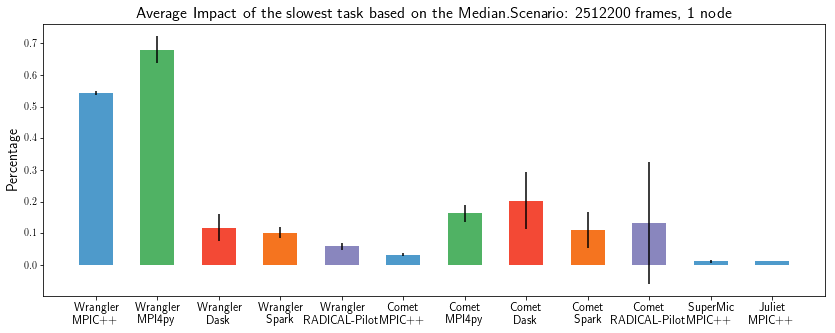

In [11]:
impactWranglerMpiCpp1 = slowest_impact(df=wrangler_mpicppx1,nodes=[1],cores=24,center='median')
impactCometMpiCpp1    = slowest_impact(df=comet_mpicppx1,nodes=[1],cores=24,center='median')
impactSuperMicMpiCpp1 = slowest_impact(df=supermic_mpicppx1,nodes=[1],cores=20,center='median')
impactJulietMpiCpp1   = slowest_impact(df=juliet_mpicppx1,nodes=[1],cores=24,center='median')
impactCometMpi4py1    = slowest_impact(df=comet_mpi4py,nodes=[1],cores=24,center='median')
impactWranglerMpi4py1 = slowest_impact(df=wrangler_mpi4py,nodes=[1],cores=24,center='median')
impactCometDask1      = slowest_impact(df=comet_dask,nodes=[1],cores=24,center='median')
impactWranglerDask1   = slowest_impact(df=wrangler_dask,nodes=[1],cores=24,center='median')
impactCometSpark1     = slowest_impact(df=comet_spark,nodes=[1],cores=24,center='median')
impactWranglerSpark1  = slowest_impact(df=wrangler_spark,nodes=[1],cores=24,center='median')
impactCometRp1        = slowest_impact(df=comet_rp,nodes=[1],cores=24,center='median')
impactWranglerRp1     = slowest_impact(df=wrangler_rp,nodes=[1],cores=24,center='median')

fig,axes = plt.subplots(nrows=1,ncols=1, sharex=True,sharey=True,figsize=[14,5],gridspec_kw={'wspace':0.05, 'hspace':0.05})
width = 0.55
axes.bar(0, np.mean(impactWranglerMpiCpp1),yerr=np.std(impactWranglerMpiCpp1),color=blues(150),width=width,label='Wrangler MPIC++')
axes.bar(1, np.mean(impactWranglerMpi4py1),yerr=np.std(impactWranglerMpi4py1),color=greens(150),width=width,label='Wrangler MPI4py')
axes.bar(2, np.mean(impactWranglerDask1  ),yerr=np.std(impactWranglerDask1  ),color=reds(150),width=width,label='Wrangler Dask')
axes.bar(3, np.mean(impactWranglerSpark1 ),yerr=np.std(impactWranglerSpark1 ),color=oranges(150),width=width,label='Wrangler Spark')
axes.bar(4, np.mean(impactWranglerRp1    ),yerr=np.std(impactWranglerRp1    ),color=purples(150),width=width,label='Wrangler RADICAL-Pilot')
axes.bar(5, np.mean(impactCometMpiCpp1   ),yerr=np.std(impactCometMpiCpp1   ),color=blues(150),width=width,label='Comet MPIC++')
axes.bar(6, np.mean(impactCometMpi4py1   ),yerr=np.std(impactCometMpi4py1   ),color=greens(150),width=width,label='Comet MPI4py')
axes.bar(7, np.mean(impactCometDask1     ),yerr=np.std(impactCometDask1     ),color=reds(150),width=width,label='Comet Dask')
axes.bar(8, np.mean(impactCometSpark1    ),yerr=np.std(impactCometSpark1    ),color=oranges(150),width=width,label='Comet Spark')
axes.bar(9, np.mean(impactCometRp1       ),yerr=np.std(impactCometRp1       ),color=purples(150),width=width,label='Comet RADICAL-Pilot')
axes.bar(10,np.mean(impactSuperMicMpiCpp1),yerr=np.std(impactSuperMicMpiCpp1),color=blues(150),width=width,label='SuperMic MPIC++')
axes.bar(11,np.mean(impactJulietMpiCpp1  ),yerr=np.std(impactJulietMpiCpp1  ),color=blues(150),width=width,label='Juliet MPIC++')
axes.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11])
axes.set_xticklabels(['Wrangler\nMPIC++','Wrangler\nMPI4py','Wrangler\nDask','Wrangler\nSpark','Wrangler\nRADICAL-Pilot','Comet\nMPIC++','Comet\nMPI4py',\
                      'Comet\nDask','Comet\nSpark','Comet\nRADICAL-Pilot','SuperMic\nMPIC++','Juliet\nMPIC++'],fontsize=12)
axes.set_ylabel('Percentage',fontsize=14)
axes.set_title('Average Impact of the slowest task based on the Median.Scenario: 2512200 frames, 1 node',fontsize=16)
#fig.savefig('stragglers/tidy_data/impact1node.pdf',dpi=800,bbox_inches='tight',pad_inches=0)

/Users/iparask/anaconda2/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/iparask/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/iparask/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/iparask/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/iparask/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


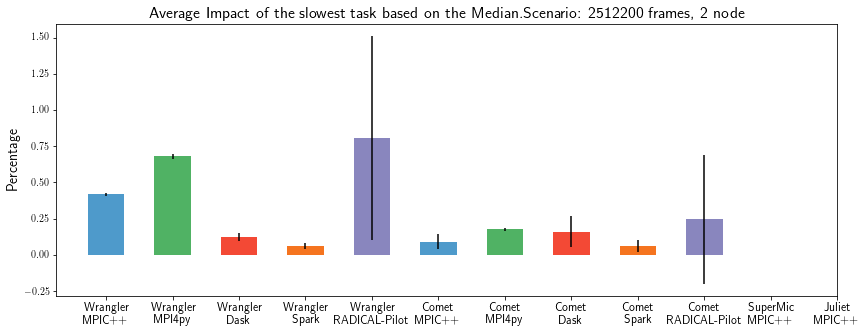

In [12]:
impactWranglerMpiCpp1 = slowest_impact(df=wrangler_mpicppx1,nodes=[2],cores=24,center='median')
impactCometMpiCpp1    = slowest_impact(df=comet_mpicppx1,nodes=[2],cores=24,center='median')
impactSuperMicMpiCpp1 = slowest_impact(df=supermic_mpicppx1,nodes=[2],cores=20,center='median')
impactJulietMpiCpp1   = slowest_impact(df=juliet_mpicppx1,nodes=[2],cores=24,center='median')
impactCometMpi4py1    = slowest_impact(df=comet_mpi4py,nodes=[2],cores=24,center='median')
impactWranglerMpi4py1 = slowest_impact(df=wrangler_mpi4py,nodes=[2],cores=24,center='median')
impactCometDask1      = slowest_impact(df=comet_dask,nodes=[2],cores=24,center='median')
impactWranglerDask1   = slowest_impact(df=wrangler_dask,nodes=[2],cores=24,center='median')
impactCometSpark1     = slowest_impact(df=comet_spark,nodes=[2],cores=24,center='median')
impactWranglerSpark1  = slowest_impact(df=wrangler_spark,nodes=[2],cores=24,center='median')
impactCometRp1        = slowest_impact(df=comet_rp,nodes=[2],cores=24,center='median')
impactWranglerRp1     = slowest_impact(df=wrangler_rp,nodes=[2],cores=24,center='median')

fig,axes = plt.subplots(nrows=1,ncols=1, sharex=True,sharey=True,figsize=[14,5],gridspec_kw={'wspace':0.05, 'hspace':0.05})
width = 0.55
axes.bar(0, np.mean(impactWranglerMpiCpp1),yerr=np.std(impactWranglerMpiCpp1),color=blues(150),width=width,label='Wrangler MPIC++')
axes.bar(1, np.mean(impactWranglerMpi4py1),yerr=np.std(impactWranglerMpi4py1),color=greens(150),width=width,label='Wrangler MPI4py')
axes.bar(2, np.mean(impactWranglerDask1  ),yerr=np.std(impactWranglerDask1  ),color=reds(150),width=width,label='Wrangler Dask')
axes.bar(3, np.mean(impactWranglerSpark1 ),yerr=np.std(impactWranglerSpark1 ),color=oranges(150),width=width,label='Wrangler Spark')
axes.bar(4, np.mean(impactWranglerRp1    ),yerr=np.std(impactWranglerRp1    ),color=purples(150),width=width,label='Wrangler RADICAL-Pilot')
axes.bar(5, np.mean(impactCometMpiCpp1   ),yerr=np.std(impactCometMpiCpp1   ),color=blues(150),width=width,label='Comet MPIC++')
axes.bar(6, np.mean(impactCometMpi4py1   ),yerr=np.std(impactCometMpi4py1   ),color=greens(150),width=width,label='Comet MPI4py')
axes.bar(7, np.mean(impactCometDask1     ),yerr=np.std(impactCometDask1     ),color=reds(150),width=width,label='Comet Dask')
axes.bar(8, np.mean(impactCometSpark1    ),yerr=np.std(impactCometSpark1    ),color=oranges(150),width=width,label='Comet Spark')
axes.bar(9, np.mean(impactCometRp1       ),yerr=np.std(impactCometRp1       ),color=purples(150),width=width,label='Comet RADICAL-Pilot')
axes.bar(10,np.mean(impactSuperMicMpiCpp1),yerr=np.std(impactSuperMicMpiCpp1),color=blues(150),width=width,label='SuperMic MPIC++')
axes.bar(11,np.mean(impactJulietMpiCpp1  ),yerr=np.std(impactJulietMpiCpp1  ),color=blues(150),width=width,label='Juliet MPIC++')
axes.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11])
axes.set_xticklabels(['Wrangler\nMPIC++','Wrangler\nMPI4py','Wrangler\nDask','Wrangler\nSpark','Wrangler\nRADICAL-Pilot','Comet\nMPIC++','Comet\nMPI4py',\
                      'Comet\nDask','Comet\nSpark','Comet\nRADICAL-Pilot','SuperMic\nMPIC++','Juliet\nMPIC++'],fontsize=12)
axes.set_ylabel('Percentage',fontsize=14)
axes.set_title('Average Impact of the slowest task based on the Median.Scenario: 2512200 frames, 2 node',fontsize=16)
#fig.savefig('stragglers/tidy_data/impact1node.pdf',dpi=800,bbox_inches='tight',pad_inches=0)

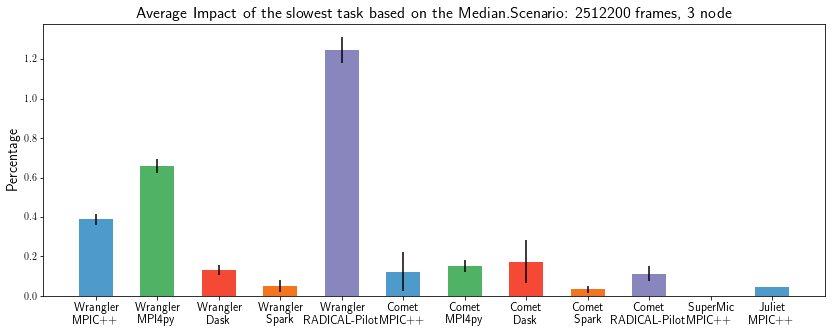

In [13]:
impactWranglerMpiCpp1 = slowest_impact(df=wrangler_mpicppx1,nodes=[3],cores=24,center='median')
impactCometMpiCpp1    = slowest_impact(df=comet_mpicppx1,nodes=[3],cores=24,center='median')
impactSuperMicMpiCpp1 = slowest_impact(df=supermic_mpicppx1,nodes=[3],cores=20,center='median')
impactJulietMpiCpp1   = slowest_impact(df=juliet_mpicppx1,nodes=[3],cores=24,center='median')
impactCometMpi4py1    = slowest_impact(df=comet_mpi4py,nodes=[3],cores=24,center='median')
impactWranglerMpi4py1 = slowest_impact(df=wrangler_mpi4py,nodes=[3],cores=24,center='median')
impactCometDask1      = slowest_impact(df=comet_dask,nodes=[3],cores=24,center='median')
impactWranglerDask1   = slowest_impact(df=wrangler_dask,nodes=[3],cores=24,center='median')
impactCometSpark1     = slowest_impact(df=comet_spark,nodes=[3],cores=24,center='median')
impactWranglerSpark1  = slowest_impact(df=wrangler_spark,nodes=[3],cores=24,center='median')
impactCometRp1        = slowest_impact(df=comet_rp,nodes=[3],cores=24,center='median')
impactWranglerRp1     = slowest_impact(df=wrangler_rp,nodes=[3],cores=24,center='median')

fig,axes = plt.subplots(nrows=1,ncols=1, sharex=True,sharey=True,figsize=[14,5],gridspec_kw={'wspace':0.05, 'hspace':0.05})
width = 0.55
axes.bar(0, np.mean(impactWranglerMpiCpp1),yerr=np.std(impactWranglerMpiCpp1),color=blues(150),width=width,label='Wrangler MPIC++')
axes.bar(1, np.mean(impactWranglerMpi4py1),yerr=np.std(impactWranglerMpi4py1),color=greens(150),width=width,label='Wrangler MPI4py')
axes.bar(2, np.mean(impactWranglerDask1  ),yerr=np.std(impactWranglerDask1  ),color=reds(150),width=width,label='Wrangler Dask')
axes.bar(3, np.mean(impactWranglerSpark1 ),yerr=np.std(impactWranglerSpark1 ),color=oranges(150),width=width,label='Wrangler Spark')
axes.bar(4, np.mean(impactWranglerRp1    ),yerr=np.std(impactWranglerRp1    ),color=purples(150),width=width,label='Wrangler RADICAL-Pilot')
axes.bar(5, np.mean(impactCometMpiCpp1   ),yerr=np.std(impactCometMpiCpp1   ),color=blues(150),width=width,label='Comet MPIC++')
axes.bar(6, np.mean(impactCometMpi4py1   ),yerr=np.std(impactCometMpi4py1   ),color=greens(150),width=width,label='Comet MPI4py')
axes.bar(7, np.mean(impactCometDask1     ),yerr=np.std(impactCometDask1     ),color=reds(150),width=width,label='Comet Dask')
axes.bar(8, np.mean(impactCometSpark1    ),yerr=np.std(impactCometSpark1    ),color=oranges(150),width=width,label='Comet Spark')
axes.bar(9, np.mean(impactCometRp1       ),yerr=np.std(impactCometRp1       ),color=purples(150),width=width,label='Comet RADICAL-Pilot')
axes.bar(10,np.mean(impactSuperMicMpiCpp1),yerr=np.std(impactSuperMicMpiCpp1),color=blues(150),width=width,label='SuperMic MPIC++')
axes.bar(11,np.mean(impactJulietMpiCpp1  ),yerr=np.std(impactJulietMpiCpp1  ),color=blues(150),width=width,label='Juliet MPIC++')
axes.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11])
axes.set_xticklabels(['Wrangler\nMPIC++','Wrangler\nMPI4py','Wrangler\nDask','Wrangler\nSpark','Wrangler\nRADICAL-Pilot','Comet\nMPIC++','Comet\nMPI4py',\
                      'Comet\nDask','Comet\nSpark','Comet\nRADICAL-Pilot','SuperMic\nMPIC++','Juliet\nMPIC++'],fontsize=12)
axes.set_ylabel('Percentage',fontsize=14)
axes.set_title('Average Impact of the slowest task based on the Median.Scenario: 2512200 frames, 3 node',fontsize=16)
#fig.savefig('stragglers/tidy_data/impact1node.pdf',dpi=800,bbox_inches='tight',pad_inches=0)